In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/C5295630/Documents/DataScience/Assignment/Linear Regretion/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.shape

(21, 2)

In [4]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data['Sorting Time'] = data['Sorting Time'].astype('float')

In [7]:
data=data.rename({'Delivery Time' : 'DT'},axis=1)

In [8]:
data=data.rename({'Sorting Time' : 'ST'},axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [10]:
import seaborn as sns
import statsmodels.formula.api as smf

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

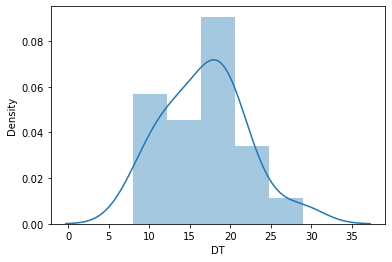

In [11]:
sns.distplot(data['DT'])

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

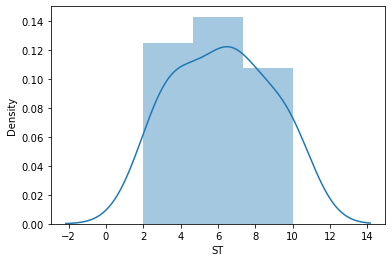

In [12]:
sns.distplot(data['ST'])

In [13]:
data.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [14]:
data.corr() ## strongly correlated

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


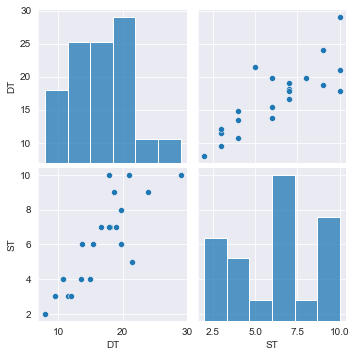

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

<AxesSubplot:xlabel='ST', ylabel='DT'>

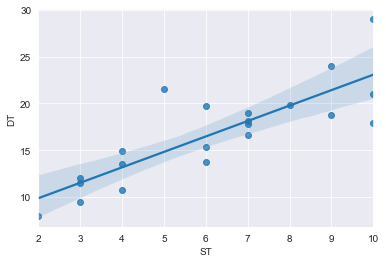

In [16]:
sns.regplot(x='ST',y='DT',data=data)

In [17]:
model1 = smf.ols("data['DT']~data['ST']",data=data).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data['DT']   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        18:14:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
data['ST']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


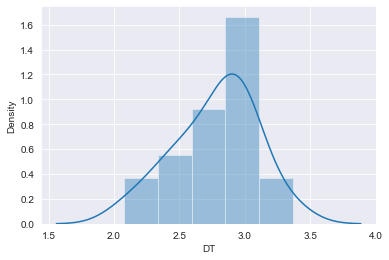

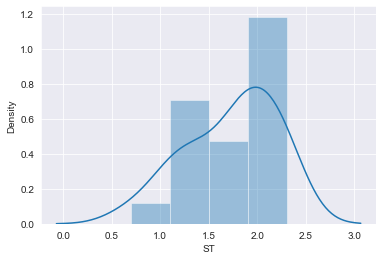

<Figure size 432x288 with 0 Axes>

In [19]:
data2 = data
data2['DT'] = np.log(data['DT'])
data2['ST'] = np.log(data['ST'])

sns.distplot(data2['DT'])
fig = plt.figure()

sns.distplot(data2['ST'])
fig = plt.figure()

In [20]:
model2 = smf.ols("data2['DT']~data2['ST']",data=data2).fit()
model2.summary() ##R-Squared Value is low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            data2['DT']   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.60e-07
Time:                        18:20:39   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
data2['ST']     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


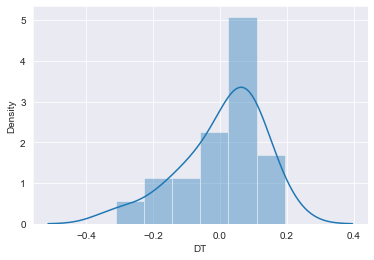

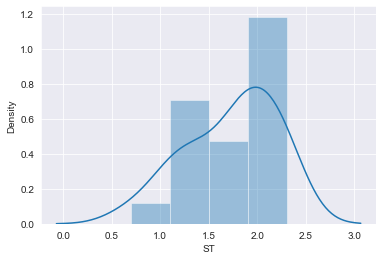

<Figure size 432x288 with 0 Axes>

In [22]:
data3 = data
data2['DT'] = np.log(data2['DT'])


sns.distplot(data2['DT'])
fig = plt.figure()

sns.distplot(data2['ST'])
fig = plt.figure()

In [23]:
model3 = smf.ols("data3['DT']~data3['ST']",data=data3).fit()
model3.summary() ##R-Squared Value is low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            data3['DT']   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           7.78e-08
Time:                        18:22:34   Log-Likelihood:                 30.860
No. Observations:                  21   AIC:                            -57.72
Df Residuals:                      19   BIC:                            -55.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4001      0.050     -8.003      0.000      -0.505      -0.295
data3['ST']     0.2354      0.028      8.420      0.000       0.177       0.294
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.601
Skew:                           0.380   Prob(JB):                        0.740
Kurtosis:                       2.670   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


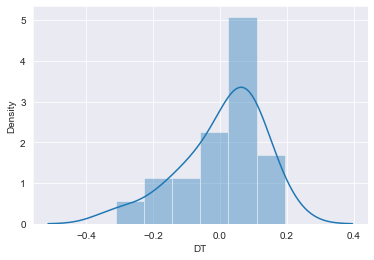

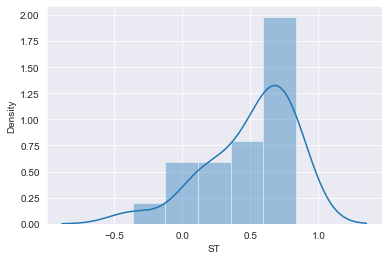

<Figure size 432x288 with 0 Axes>

In [24]:
data4 = data
data2['ST'] = np.log(data2['ST'])


sns.distplot(data2['DT'])
fig = plt.figure()

sns.distplot(data2['ST'])
fig = plt.figure()

In [25]:
model4 = smf.ols("data4['DT']~data4['ST']",data=data4).fit()
model4.summary() ##R-Squared Value is more than 0.8 and p-value is less than 0.05, so we can consider this model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            data4['DT']   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.53
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.39e-08
Time:                        18:23:47   Log-Likelihood:                 32.742
No. Observations:                  21   AIC:                            -61.48
Df Residuals:                      19   BIC:                            -59.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1718      0.022     -7.708      0.000      -0.218      -0.125
data4['ST']     0.3542      0.038      9.409      0.000       0.275       0.433
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.282
Skew:                           0.221   Prob(JB):                        0.868
Kurtosis:                       2.644   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.api as sm

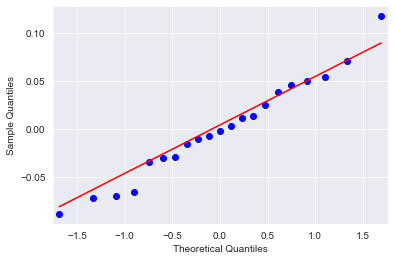

In [31]:
qqplot4 = sm.qqplot(model4.resid,line='q')

In [32]:
residual= model4.resid

In [34]:
rmse = np.sqrt((np.sum(residual**2)/21))
rmse

0.050890718050824936